In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
import math
from sklearn.preprocessing import minmax_scale
import random

import spacy

In [220]:
data = {
    "Lecture1_1" : "Информация - это сведения об объектах и явлениях окружающей среды, их параметрах, свойствах и состояниях, которые уменьшают имеющуюся о них степень неопределенности, неполноты знаний.",
    "Lecture1_2" : "Информация - это ключевое понятие современной науки, стоящее в одном ряду с понятиями \"вещество\" и \"энергия\"",
    "Lecture1_2" : "Информация - сведения об окружающем мире и протекающих в нем процессах, воспринимаемые человеком или специальными устройствами",
    "Lecture1_3" : "Информация - сообщения, передаваемые в форме знаков или сигналов",
    "Lecture1_4" : "Информация - cведения, которые снимают полностью или уменьшают существующую неопределенность",
    "Lecture1_5" : "Информация - эта та часть знаний, которая используется для ориентирования, активного действия, управления, т.е. в целях сохранения, совершенствования, развития системы",
    "Lecture1_6" : "Информация - то сведения, обладающие новизной",
    "Lecture1_7" : "Информация - это некоторая последовательность сведений, знаний, которые актуализируемы (получаемы, передаваемы, преобразуемы, сжимаемы и/или регистрируемы) с помощью некоторых знаков (символьного, образного, жестового, звукового, сенсомоторного типа).",
    "Lecture1_8" : "информация - изменение свойств наблюдателя (и субъекта, и объекта) частью свойств исследуемого объекта, в результате чего образуются модели (объекты), являющиеся функцией от свойств исследуемого объекта.",
    "Lecture1_9" : "информация - избыточность свойств моделей, возникающая в результате сравнения свойств ранее полученной объективной информации со свойствами текущей объективной информации, поступившей от объектов, имеющих подобные свойства.",
    "Wikipedia_1" : "информация - сведения (сообщения, данные) независимо от формы их представления",
    "ISO 5127:2017" : "информация - обработанные, организованные и связанные данные, которые порождают смысл (значение)",
    "ISO/IEC 10746-2:1996" : "информация - знания о предметах, фактах, идеях и т.д., которыми могут обмениваться люди в рамках конкретного контекста ",
    "SO/IEC 2382:2015" : "информация - знания относительно фактов, событий, вещей, идей и понятий, которые в определённом контексте имеют конкретный смысл",
    "ГОСТ 7.0-99" : "информация - сведения, воспринимаемые человеком и (или) специальными устройствами как отражение фактов материального или духовного мира в процессе коммуникации",
    "Wikipedia_2" : "информация - ведения, передаваемые людьми устным, письменным или каким-либо другим способом (с помощью условных сигналов, технических средств и т.д.)",
    "Urfu.ru" : "информация - это сведения о состоянии чего-либо, которые могут быть представлены в различной форме и в которые заложен некий смысл (идея, посыл). Источником информации могут выступать объекты живой и неживой природы (естественные), а также объекты, созданные человеком (неестественные).",
    "Umschool" : "Информация - это знания и сведения, которые необходимы для ориентирования и взаимодействия с окружающей средой.",
    "cyperlininka" : "Информация - способность воспринимать внутреннее состояние и воздействия окружающей среды, хранить их результаты, перерабатывать и передавать",
    "Wiener" : "Информация - Сведения, уменьшающие неопределенность",
    "Lenin" : "Информация - Отражение объективной реальности в сознании человека",
    "Kolmogorov_1" : "Информация - Способ организации и управления в самоорганизующихся системах",
    "ГОСТ 27488-87" : "Информация - Данные, представленные в форме, пригодной для обработки, хранения и передачи с помощью компьютера",
    "Harkevich" : "Информация - Совокупность сведений, независимо от формы их представления",
    "Shannon" : "Информация - Мера количества информации, содержащейся в сообщении",
    "Kolmogorov_2" : "Информация - Совокупность символов, несущих смысловую нагрузку",
    "Dobrushin" : "Информация - Алфавит и правила его использования для кодирования сообщений",
    "Vavilov" : "Информация - Совокупность сигналов, передаваемых между живыми организмами",
    "Watson" : "Информация - Генетический код, хранящийся в ДНК",
    "Darwin" : "Информация - признаки, передаваемые от родителей к потомкам",
    "Hayek" : "Информация - Товар, который имеет ценность для потребителя",
    "Drucker" : "Информация - Ресурс, который может быть использован для создания новых товаров и услуг",
    "Clark" : "Информация - Фактор производства, наряду с трудом и капиталом",
    "ГК РФ" : "Информация - Сведения, которые имеют юридическое значение",
    "Sintetic_data_1" : "Информация - представляет собой комплексный набор структурированных или неструктурированных данных, обработанных для придания им смысла, обеспечивающих восприятие, анализ, интерпретацию и использование, часто выраженных в виде текста, чисел, изображений или звуков, и предназначенных для передачи, обмена или хранения с целью улучшения понимания данных.",
    "Sintetic_data_2" : "Информация - сведение"
}

print(len(data))

35


In [ ]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 22.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [221]:
nlp = spacy.load("ru_core_news_sm")

def lemmatize_text(text):
    text = text.translate(str.maketrans("", "", string.punctuation))

    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

lemmatized_data = {key: lemmatize_text(value) for key, value in data.items()}

print(len(lemmatized_data))

for key, value in lemmatized_data.items():
    print(f"{key}: {value}")

35
Lecture1_1: информация   это сведение об объект и явление окружать среда они параметр свойство и состояние которые уменьшать иметься о них степень неопределённость неполнота знание
Lecture1_2: информация   сведение об окружать мир и протекать в нем процесс воспринимать человек или специальный устройство
Lecture1_3: информация   сообщение передавать в форма знак или сигнал
Lecture1_4: информация   cведения которые снимать полностью или уменьшать существовать неопределённость
Lecture1_5: информация   этот тот часть знание которая использоваться для ориентирование активный действие управление тот в цель сохранение совершенствование развитие система
Lecture1_6: информация   то сведение обладать новизной
Lecture1_7: информация   это некоторый последовательность сведение знание которые актуализируемы получаемы передаваемы преобразуемы сжимаемы иили регистрируемы с помощь некоторый знак символьный образный жестовый звуковой сенсомоторного тип
Lecture1_8: информация   изменение свойство наб

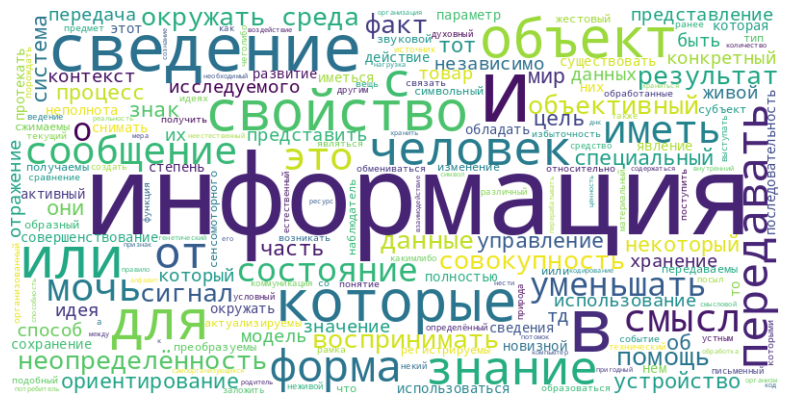

In [222]:
all_text = ' '.join(lemmatized_data.values())

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', prefer_horizontal = 0.9).generate(all_text)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [223]:
def calculate_tf(word_tokens):
    word_count = Counter(word_tokens)
    total_words = len(word_tokens)
    tf = {word: count / total_words for word, count in word_count.items()}
    return tf


def calculate_idf(documents, word):
    document_count = np.sum(1 for doc in documents.values() if word in doc)
    if document_count == 0:
        return 0

    idf = math.log2(len(documents) / document_count)
    return idf


def calculate_tfidf(tf, idf):
    return tf * idf


vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(list(lemmatized_data.values()))

feature_names = vectorizer.get_feature_names_out()
document_names = list(lemmatized_data.keys())

scores = {}

for i, document_name in enumerate(document_names):
    sum = 0
    word_count = 0

    doc = lemmatized_data[document_name].split()
    tf_scores = calculate_tf(doc)
    unique_words = set(doc)

    tfidf_scores = {}
    for word in unique_words:
        tf = tf_scores[word]
        idf = calculate_idf(lemmatized_data, word)
        tfidf = calculate_tfidf(tf, idf)
        tfidf_scores[word] = tfidf

    print(f"\nTF-IDF Scores for File {document_name}:")
    for word, tfidf in tfidf_scores.items():
        if tfidf > 0:
            print(f"{word}: {tfidf:.4f}")
            sum += tfidf
            word_count += 1

    scores[document_name] = sum / word_count



TF-IDF Scores for File Lecture1_1:
об: 0.0320
неопределённость: 0.1541
которые: 0.0926
явление: 0.2230
неполнота: 0.2230
свойство: 0.1541
уменьшать: 0.1541
объект: 0.1221
среда: 0.1541
иметься: 0.2230
степень: 0.2230
знание: 0.1010
это: 0.1221
состояние: 0.1541
параметр: 0.2230
они: 0.1541
сведение: 0.0671
них: 0.2230
окружать: 0.1361

TF-IDF Scores for File Lecture1_2:
устройство: 0.2753
нем: 0.3420
процесс: 0.2753
воспринимать: 0.2363
об: 0.0491
человек: 0.1696
мир: 0.2753
сведение: 0.1030
или: 0.1548
окружать: 0.2086
протекать: 0.3420
специальный: 0.2753

TF-IDF Scores for File Lecture1_3:
сообщение: 0.3912
передавать: 0.3509
знак: 0.4430
сигнал: 0.4430
или: 0.2902

TF-IDF Scores for File Lecture1_4:
снимать: 0.5699
неопределённость: 0.3938
которые: 0.2366
полностью: 0.5699
существовать: 0.5699
уменьшать: 0.3938
cведения: 0.5699
или: 0.2580

TF-IDF Scores for File Lecture1_5:
тот: 0.5399
ориентирование: 0.2173
развитие: 0.2700
знание: 0.1222
которая: 0.2700
использоваться: 0.2700
д

In [224]:
min_max_normalized_values = minmax_scale(list(scores.values()))

for i, (key, value) in enumerate(scores.items()):
    normalized_value = min_max_normalized_values[i]
    scores[key] = normalized_value

for key, value in scores.items():
    print(f"{key}: {value:.4f}")

Lecture1_1: 0.0560
Lecture1_2: 0.1578
Lecture1_3: 0.3844
Lecture1_4: 0.4727
Lecture1_5: 0.1881
Lecture1_6: 0.7435
Lecture1_7: 0.1006
Lecture1_8: 0.1779
Lecture1_9: 0.1271
Wikipedia_1: 0.2958
ISO 5127:2017: 0.4280
ISO/IEC 10746-2:1996: 0.2046
SO/IEC 2382:2015: 0.1835
ГОСТ 7.0-99: 0.1506
Wikipedia_2: 0.1322
Urfu.ru: 0.0094
Umschool: 0.1345
cyperlininka: 0.2192
Wiener: 0.8656
Lenin: 0.6970
Kolmogorov_1: 0.6250
ГОСТ 27488-87: 0.2097
Harkevich: 0.3465
Shannon: 0.7823
Kolmogorov_2: 0.9362
Dobrushin: 0.4965
Vavilov: 0.6632
Watson: 1.0000
Darwin: 0.4859
Hayek: 0.6215
Drucker: 0.3399
Clark: 0.6015
ГК РФ: 0.5865
Sintetic_data_1: 0.0000
Sintetic_data_2: 0.9412


In [225]:
sorted_scores = dict(sorted(scores.items(), key = lambda item: item[1], reverse = True))

for key, value in sorted_scores.items():
    print(f"{key}: {value:.4f}")

Watson: 1.0000
Sintetic_data_2: 0.9412
Kolmogorov_2: 0.9362
Wiener: 0.8656
Shannon: 0.7823
Lecture1_6: 0.7435
Lenin: 0.6970
Vavilov: 0.6632
Kolmogorov_1: 0.6250
Hayek: 0.6215
Clark: 0.6015
ГК РФ: 0.5865
Dobrushin: 0.4965
Darwin: 0.4859
Lecture1_4: 0.4727
ISO 5127:2017: 0.4280
Lecture1_3: 0.3844
Harkevich: 0.3465
Drucker: 0.3399
Wikipedia_1: 0.2958
cyperlininka: 0.2192
ГОСТ 27488-87: 0.2097
ISO/IEC 10746-2:1996: 0.2046
Lecture1_5: 0.1881
SO/IEC 2382:2015: 0.1835
Lecture1_8: 0.1779
Lecture1_2: 0.1578
ГОСТ 7.0-99: 0.1506
Umschool: 0.1345
Wikipedia_2: 0.1322
Lecture1_9: 0.1271
Lecture1_7: 0.1006
Lecture1_1: 0.0560
Urfu.ru: 0.0094
Sintetic_data_1: 0.0000


In [226]:
lexical_density_values = {}

char_counts = dict(Counter("".join(lemmatized_data.values())))

total_chars = np.sum(char_counts[char] for char in char_counts if char != ' ')

print(char_counts)

H_max = np.log2(32)

for key, value in lemmatized_data.items():
    sum = 0
    char_count = 0
    for word in value:
        for char in word:
            if char != ' ':
              sum += char_counts[char] / total_chars

    H = -sum * np.log2(sum) if char_count != 0 else 0

    lexical_density_values[key] = sum


min_max_normalized_values = minmax_scale(list(lexical_density_values.values()))

for i, (key, value) in enumerate(lexical_density_values.items()):
    normalized_value = min_max_normalized_values[i]
    lexical_density_values[key] = normalized_value

for key, value in lexical_density_values.items():
    print(f"{key}: {value:.4f}")

{'и': 312, 'н': 242, 'ф': 50, 'о': 330, 'р': 179, 'м': 114, 'а': 218, 'ц': 50, 'я': 76, ' ': 498, 'э': 5, 'т': 218, 'с': 185, 'в': 140, 'е': 298, 'д': 86, 'б': 48, 'ъ': 12, 'к': 91, 'л': 90, 'у': 53, 'ж': 17, 'ь': 99, 'п': 75, 'й': 56, 'ы': 67, 'ш': 5, 'х': 15, 'ё': 4, 'з': 49, 'ч': 32, 'щ': 11, 'г': 18, 'c': 1, 'ю': 5}
Lecture1_1: 0.5229
Lecture1_2: 0.2947
Lecture1_3: 0.1118
Lecture1_4: 0.2353
Lecture1_5: 0.5168
Lecture1_6: 0.0732
Lecture1_7: 0.6952
Lecture1_8: 0.5177
Lecture1_9: 0.6125
Wikipedia_1: 0.2018
ISO 5127:2017: 0.2277
ISO/IEC 10746-2:1996: 0.2736
SO/IEC 2382:2015: 0.3374
ГОСТ 7.0-99: 0.3964
Wikipedia_2: 0.3578
Urfu.ru: 0.7847
Umschool: 0.3070
cyperlininka: 0.4062
Wiener: 0.0938
Lenin: 0.1506
Kolmogorov_1: 0.1653
ГОСТ 27488-87: 0.2412
Harkevich: 0.1827
Shannon: 0.1428
Kolmogorov_2: 0.1113
Dobrushin: 0.1895
Vavilov: 0.1275
Watson: 0.0640
Darwin: 0.1003
Hayek: 0.1156
Drucker: 0.1741
Clark: 0.0969
ГК РФ: 0.1258
Sintetic_data_1: 1.0000
Sintetic_data_2: 0.0000


In [227]:
sorted_lexical_density = dict(sorted(lexical_density_values.items(), key = lambda item: item[1], reverse = True))

for key, value in sorted_lexical_density.items():
    print(f"{key}: {value:.4f}")

Sintetic_data_1: 1.0000
Urfu.ru: 0.7847
Lecture1_7: 0.6952
Lecture1_9: 0.6125
Lecture1_1: 0.5229
Lecture1_8: 0.5177
Lecture1_5: 0.5168
cyperlininka: 0.4062
ГОСТ 7.0-99: 0.3964
Wikipedia_2: 0.3578
SO/IEC 2382:2015: 0.3374
Umschool: 0.3070
Lecture1_2: 0.2947
ISO/IEC 10746-2:1996: 0.2736
ГОСТ 27488-87: 0.2412
Lecture1_4: 0.2353
ISO 5127:2017: 0.2277
Wikipedia_1: 0.2018
Dobrushin: 0.1895
Harkevich: 0.1827
Drucker: 0.1741
Kolmogorov_1: 0.1653
Lenin: 0.1506
Shannon: 0.1428
Vavilov: 0.1275
ГК РФ: 0.1258
Hayek: 0.1156
Lecture1_3: 0.1118
Kolmogorov_2: 0.1113
Darwin: 0.1003
Clark: 0.0969
Wiener: 0.0938
Lecture1_6: 0.0732
Watson: 0.0640
Sintetic_data_2: 0.0000


In [228]:
harmonic_means = {}

for key in scores.keys():
    score_value = scores[key]
    lexical_density_value = lexical_density_values[key]

    harmonic_mean = 2 * score_value * lexical_density_value / (score_value + lexical_density_value)

    harmonic_means[key] = harmonic_mean

for key, value in harmonic_means.items():
    print(f"{key}: {value:.4f}")

Lecture1_1: 0.1012
Lecture1_2: 0.2055
Lecture1_3: 0.1732
Lecture1_4: 0.3142
Lecture1_5: 0.2759
Lecture1_6: 0.1332
Lecture1_7: 0.1757
Lecture1_8: 0.2648
Lecture1_9: 0.2106
Wikipedia_1: 0.2400
ISO 5127:2017: 0.2973
ISO/IEC 10746-2:1996: 0.2341
SO/IEC 2382:2015: 0.2377
ГОСТ 7.0-99: 0.2183
Wikipedia_2: 0.1931
Urfu.ru: 0.0185
Umschool: 0.1870
cyperlininka: 0.2847
Wiener: 0.1693
Lenin: 0.2477
Kolmogorov_1: 0.2615
ГОСТ 27488-87: 0.2243
Harkevich: 0.2393
Shannon: 0.2416
Kolmogorov_2: 0.1989
Dobrushin: 0.2743
Vavilov: 0.2139
Watson: 0.1203
Darwin: 0.1663
Hayek: 0.1949
Drucker: 0.2303
Clark: 0.1669
ГК РФ: 0.2071
Sintetic_data_1: 0.0000
Sintetic_data_2: 0.0000


In [229]:
sorted_harmonic_means = dict(sorted(harmonic_means.items(), key = lambda item: item[1], reverse = True))

for key, value in sorted_harmonic_means.items():
    print(f"{key}: {value:.4f}")

Lecture1_4: 0.3142
ISO 5127:2017: 0.2973
cyperlininka: 0.2847
Lecture1_5: 0.2759
Dobrushin: 0.2743
Lecture1_8: 0.2648
Kolmogorov_1: 0.2615
Lenin: 0.2477
Shannon: 0.2416
Wikipedia_1: 0.2400
Harkevich: 0.2393
SO/IEC 2382:2015: 0.2377
ISO/IEC 10746-2:1996: 0.2341
Drucker: 0.2303
ГОСТ 27488-87: 0.2243
ГОСТ 7.0-99: 0.2183
Vavilov: 0.2139
Lecture1_9: 0.2106
ГК РФ: 0.2071
Lecture1_2: 0.2055
Kolmogorov_2: 0.1989
Hayek: 0.1949
Wikipedia_2: 0.1931
Umschool: 0.1870
Lecture1_7: 0.1757
Lecture1_3: 0.1732
Wiener: 0.1693
Clark: 0.1669
Darwin: 0.1663
Lecture1_6: 0.1332
Watson: 0.1203
Lecture1_1: 0.1012
Urfu.ru: 0.0185
Sintetic_data_1: 0.0000
Sintetic_data_2: 0.0000
